The main purpose of this notebook is to explore the dataset


In [59]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [60]:
# Load the dataset


# Define the base directory containing data files
base_dir = "/Users/dino/code/Obispodino/cvino/raw_data/X-Wines_Official_Repository/last"  # Updated to absolute path
wines_file = os.path.join(base_dir, "XWines_Full_100K_wines.csv")
wines_data = pd.read_csv(wines_file)
wd = wines_data
wd.head()

,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
3,100004,Virtus Moscato,White,Varietal/100%,['Muscat/Moscato'],['Sweet Dessert'],12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10003,Monte Paschoal,http://www.montepaschoal.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


Total number of wines: 100646
Number of unique countries: 62
Number of unique regions: 2160
Number of unique wineries: 30190


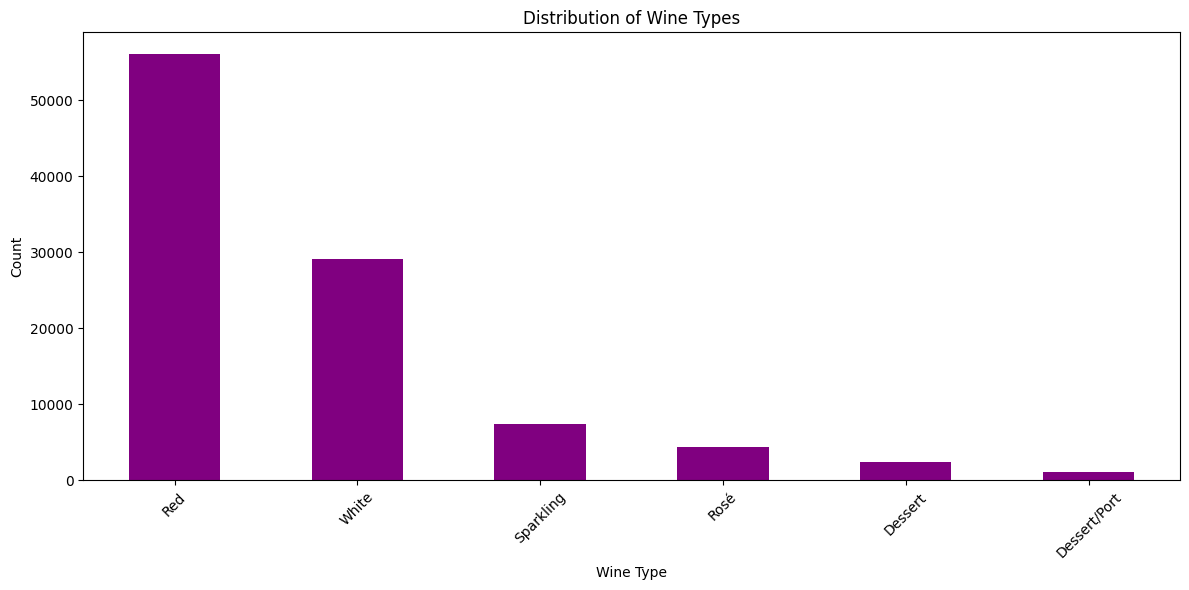

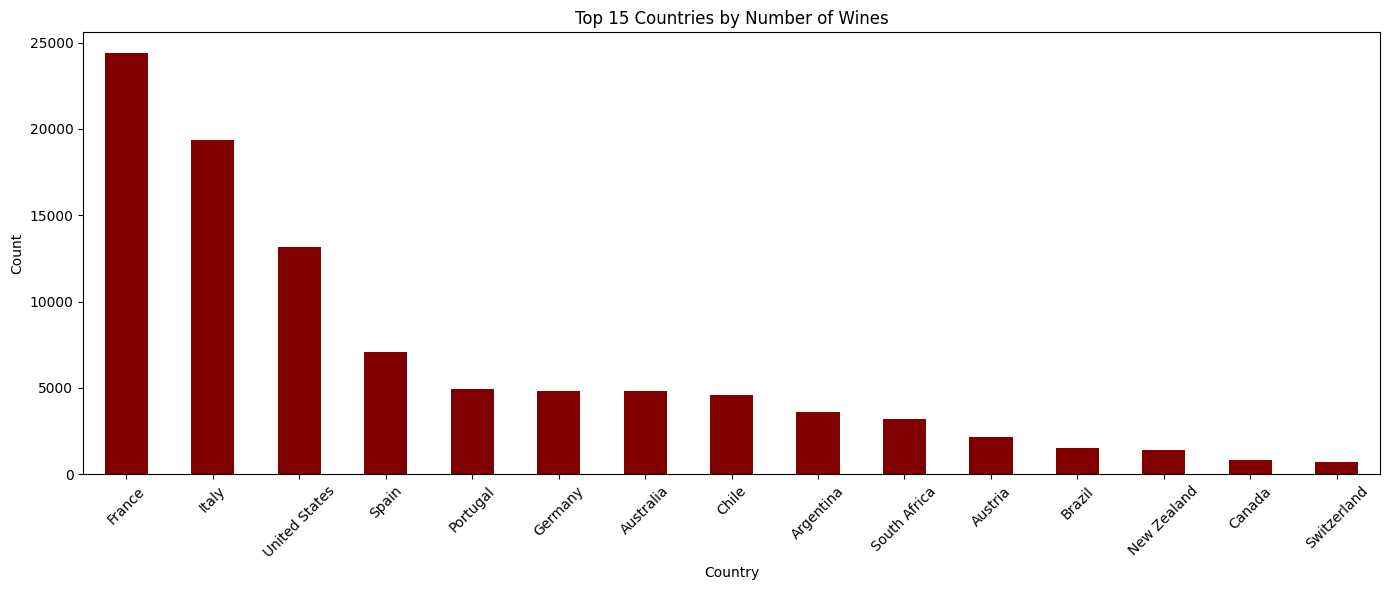

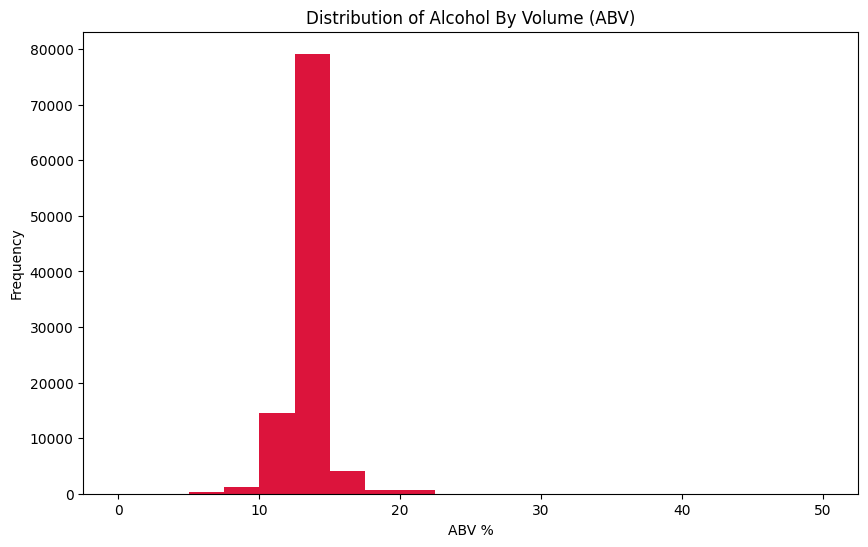

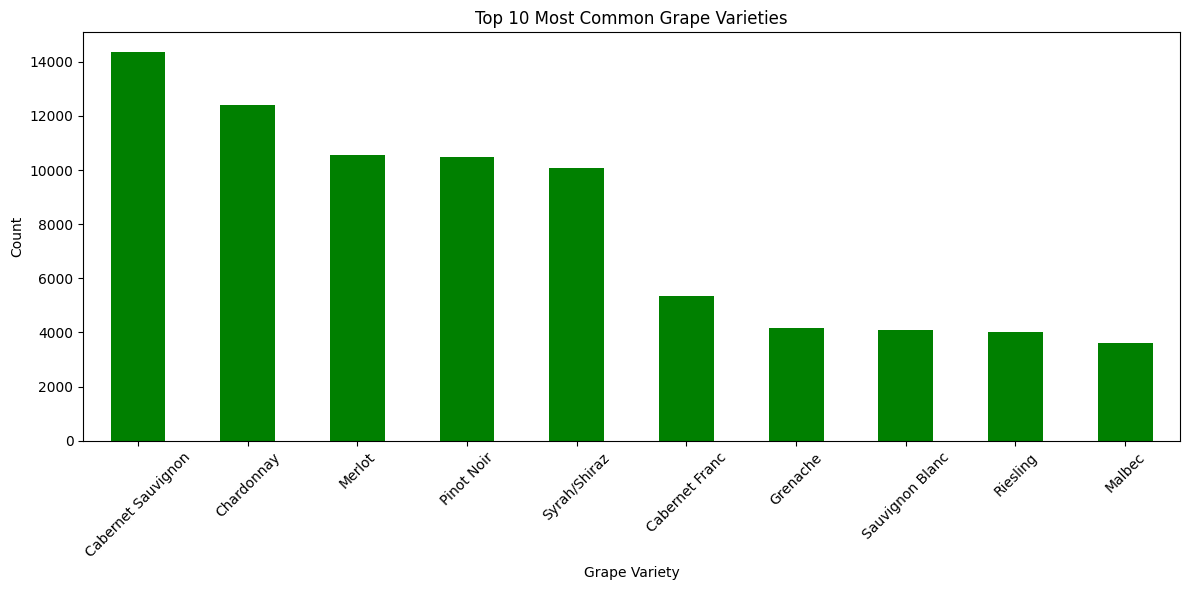

In [61]:
# Explore the wines dataset

# Basic information about the dataset
print(f"Total number of wines: {len(wd)}")
print(f"Number of unique countries: {wd['Country'].nunique()}")
print(f"Number of unique regions: {wd['RegionName'].nunique()}")
print(f"Number of unique wineries: {wd['WineryName'].nunique()}")

# Distribution of wine types
plt.figure(figsize=(12, 6))
type_counts = wd['Type'].value_counts()
type_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of wines by country (top 15)
plt.figure(figsize=(14, 6))
country_counts = wd['Country'].value_counts().head(15)
country_counts.plot(kind='bar', color='maroon')
plt.title('Top 15 Countries by Number of Wines')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ABV distribution
plt.figure(figsize=(10, 6))
wd['ABV'].hist(bins=20, color='crimson')
plt.title('Distribution of Alcohol By Volume (ABV)')
plt.xlabel('ABV %')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Convert string lists to actual lists for analysis
# Example with Grapes column
wd['Grapes_list'] = wd['Grapes'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Top 10 most common grape varieties
all_grapes = [grape for sublist in wd['Grapes_list'] for grape in sublist]
grape_counts = pd.Series(all_grapes).value_counts().head(10)

plt.figure(figsize=(12, 6))
grape_counts.plot(kind='bar', color='green')
plt.title('Top 10 Most Common Grape Varieties')
plt.xlabel('Grape Variety')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Load the ratings dataset
ratingstxt = "XWines_Full_21M_ratings.csv"
ratings_file = os.path.join(base_dir, ratingstxt)
ratings = pd.read_csv(ratings_file)
ratings.head()

/var/folders/2k/f80hp_x95nz3w249z8ch76fc0000gn/T/ipykernel_60516/3398277075.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(ratings_file)


,RatingID,UserID,WineID,Vintage,Rating,Date
0,1,1604441,136103,1950,4.0,2019-10-14 11:20:52
1,2,1291483,136103,1950,5.0,2019-11-28 03:36:33
2,3,1070605,104036,1950,5.0,2017-12-28 10:15:55
3,4,1080181,144864,1950,5.0,2016-06-23 02:16:22
4,5,1834379,111430,1950,5.0,2021-05-16 17:58:14


In [63]:
ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013536 entries, 0 to 21013535
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   RatingID  int64  
 1   UserID    int64  
 2   WineID    int64  
 3   Vintage   object 
 4   Rating    float64
 5   Date      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 961.9+ MB


In [64]:
# DATA CLEANING STAGE - Step 1: Assess Data Quality
print("=== DATA QUALITY ASSESSMENT ===")
print("\n1. WINES DATASET:")
print(f"Shape: {wd.shape}")
print(f"Missing values per column:")
print(wd.isnull().sum())
# Create a copy without list columns for duplicate checking
wd_for_dup_check = wd.drop(columns=['Grapes_list'])
print(f"\nDuplicate rows: {wd_for_dup_check.duplicated().sum()}")

print("\n2. RATINGS DATASET:")
print(f"Shape: {ratings.shape}")
print(f"Missing values per column:")
print(ratings.isnull().sum())
print(f"\nDuplicate rows: {ratings.duplicated().sum()}")

# Check data types
print("\n3. WINES DATA TYPES:")
print(wd.dtypes)

=== DATA QUALITY ASSESSMENT ===

1. WINES DATASET:
Shape: (100646, 18)
Missing values per column:
WineID             0
WineName           0
Type               0
Elaborate          0
Grapes             0
Harmonize          0
ABV                0
Body               0
Acidity            0
Code               0
Country            0
RegionID           0
RegionName         0
WineryID           0
WineryName         0
Website        17867
Vintages           0
Grapes_list        0
dtype: int64

Duplicate rows: 0

2. RATINGS DATASET:
Shape: (21013536, 6)
Missing values per column:
RatingID    0
UserID      0
WineID      0
Vintage     0
Rating      0
Date        0
dtype: int64

Duplicate rows: 0

3. WINES DATA TYPES:
WineID           int64
WineName        object
Type            object
Elaborate       object
Grapes          object
Harmonize       object
ABV            float64
Body            object
Acidity         object
Code            object
Country         object
RegionID         int64
RegionNam

In [65]:
# DATA CLEANING STAGE - Step 2: Clean Wine Dataset
print("=== CLEANING WINES DATASET ===")

# Create a clean copy
wines_clean = wd.copy()

# 1. Handle missing values
print("Handling missing values...")
# Drop rows with missing essential information
wines_clean = wines_clean.dropna(subset=['WineName', 'Country', 'Type'])

# Fill missing ABV with median by wine type
wines_clean['ABV'] = wines_clean.groupby('Type')['ABV'].transform(lambda x: x.fillna(x.median()))

# Fill missing RegionName with 'Unknown'
wines_clean['RegionName'] = wines_clean['RegionName'].fillna('Unknown')

# Fill missing WineryName with 'Unknown'
wines_clean['WineryName'] = wines_clean['WineryName'].fillna('Unknown')

print(f"Rows after cleaning: {len(wines_clean)} (removed {len(wd) - len(wines_clean)} rows)")

# 2. Standardize text fields
print("Standardizing text fields...")
wines_clean['Country'] = wines_clean['Country'].str.strip()
wines_clean['Type'] = wines_clean['Type'].str.strip()
wines_clean['WineName'] = wines_clean['WineName'].str.strip()

# 3. Handle list columns (Grapes, Harmonize, etc.)
print("Processing list columns...")
import ast

def safe_eval(x):
    """Safely evaluate string representations of lists"""
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        return x if isinstance(x, list) else []
    except:
        return []

# Apply to list columns
list_columns = ['Grapes', 'Harmonize', 'Elaborate', 'ABV', 'Body', 'Acidity']
for col in list_columns:
    if col in wines_clean.columns:
        wines_clean[f'{col}_list'] = wines_clean[col].apply(safe_eval)

print("Wine dataset cleaning completed!")

=== CLEANING WINES DATASET ===
Handling missing values...
Rows after cleaning: 100646 (removed 0 rows)
Standardizing text fields...
Processing list columns...
Wine dataset cleaning completed!


In [66]:
# DATA CLEANING STAGE - Step 3: Clean Ratings Dataset
print("=== CLEANING RATINGS DATASET ===")

# Create a clean copy
ratings_clean = ratings.copy()

# 1. Remove invalid ratings
print("Removing invalid ratings...")
initial_count = len(ratings_clean)

# Remove ratings outside valid range (assuming 1-5 scale)
ratings_clean = ratings_clean[(ratings_clean['Rating'] >= 1) & (ratings_clean['Rating'] <= 5)]

# Remove entries with missing UserID or WineID
ratings_clean = ratings_clean.dropna(subset=['UserID', 'WineID'])

print(f"Ratings after cleaning: {len(ratings_clean)} (removed {initial_count - len(ratings_clean)} invalid ratings)")

# 2. Filter ratings for wines that exist in our clean wine dataset
print("Filtering ratings for existing wines...")
valid_wine_ids = set(wines_clean['WineID'])
ratings_clean = ratings_clean[ratings_clean['WineID'].isin(valid_wine_ids)]

print(f"Ratings after filtering: {len(ratings_clean)}")

print("Ratings dataset cleaning completed!")

=== CLEANING RATINGS DATASET ===
Removing invalid ratings...
Ratings after cleaning: 21013536 (removed 0 invalid ratings)
Filtering ratings for existing wines...
Ratings after filtering: 21013536
Ratings dataset cleaning completed!


In [ ]:
# feature selection, before encoding, drop: Elaborate, Code, Country, RegionID, WyneryID, Website, vintages, WineryName


In [ ]:
# DATA CLEANING STAGE - Step 4: Prepare Features for k-NN Model
print("=== PREPARING FEATURES FOR k-NN MODEL ===")

from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Create feature matrix
features_df = wines_clean.copy()

# 1. Encode categorical variables
print("Encoding categorical variables...")
label_encoders = {}
categorical_columns = ['Country', 'Type', 'RegionName', 'WineryName']

for col in categorical_columns:
    le = LabelEncoder()
    features_df[f'{col}_encoded'] = le.fit_transform(features_df[col])
    label_encoders[col] = le

# 2. Handle numerical features
print("Processing numerical features...")
# Ensure ABV is numeric
features_df['ABV_numeric'] = pd.to_numeric(features_df['ABV'], errors='coerce')
features_df['ABV_numeric'] = features_df['ABV_numeric'].fillna(features_df['ABV_numeric'].median())

# 3. Create wine profile features from aggregated ratings
print("Creating wine profile features...")
wine_stats = ratings_clean.groupby('WineID').agg({
    'Rating': ['mean', 'count', 'std']
}).round(2)

wine_stats.columns = ['avg_rating', 'rating_count', 'rating_std']
wine_stats = wine_stats.fillna(0)

# Merge with wine features
features_df = features_df.merge(wine_stats, left_on='WineID', right_index=True, how='left')
features_df[['avg_rating', 'rating_count', 'rating_std']] = features_df[['avg_rating', 'rating_count', 'rating_std']].fillna(0)

# 4. Select final feature columns for k-NN
feature_columns = [
    'Country_encoded', 'Type_encoded', 'RegionName_encoded',
    'ABV_numeric', 'avg_rating', 'rating_count'
]

X = features_df[feature_columns].copy()

# 5. Scale features
print("Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns, index=features_df.index)

print(f"Feature matrix shape: {X_scaled_df.shape}")
print("Feature columns:", feature_columns)
print("\nFeature matrix ready for k-NN model!")

=== PREPARING FEATURES FOR k-NN MODEL ===
Encoding categorical variables...
Processing numerical features...
Creating wine profile features...
Scaling features...
Feature matrix shape: (100646, 6)
Feature columns: ['Country_encoded', 'Type_encoded', 'RegionName_encoded', 'ABV_numeric', 'avg_rating', 'rating_count']

Feature matrix ready for k-NN model!


In [69]:
print(acidity_categories)
print(body_categories)
features_df.head()


['Low', 'Medium', 'High']
['Very light-bodied', 'Light-bodied', 'Medium-bodied', 'Full-bodied', 'Very full-bodied']


,WineID,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,...,Body_list,Acidity_list,Country_encoded,Type_encoded,RegionName_encoded,WineryName_encoded,ABV_numeric,avg_rating,rating_count,rating_std
0,100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,...,[],[],9,4,1771,4332,7.5,4.13,2625,0.74
1,100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,...,[],[],9,2,1771,4332,12.0,3.50,10,1.00
2,100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,...,[],[],9,2,1771,4607,12.0,3.38,62,0.71
3,100004,Virtus Moscato,White,Varietal/100%,['Muscat/Moscato'],['Sweet Dessert'],12.0,Medium-bodied,Medium,BR,...,[],[],9,5,1771,20305,12.0,3.17,110,0.81
4,100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,...,[],[],9,2,1771,1450,11.0,2.97,72,0.97


In [70]:
# DATA CLEANING STAGE - Step 5: Build k-NN Model
print("=== BUILDING k-NN RECOMMENDATION MODEL ===")

from sklearn.neighbors import NearestNeighbors
import joblib

# 1. Initialize and train k-NN model
print("Training k-NN model...")
knn_model = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')  # 6 to get 5 recommendations (excluding self)
knn_model.fit(X_scaled_df)

# 2. Create recommendation function
def get_wine_recommendations(wine_id, n_recommendations=5):
    """Get wine recommendations based on k-NN similarity"""
    try:
        # Find the index of the wine
        wine_idx = features_df[features_df['WineID'] == wine_id].index[0]

        # Get the wine's feature vector
        wine_features = X_scaled_df.loc[wine_idx].values.reshape(1, -1)

        # Find similar wines
        distances, indices = knn_model.kneighbors(wine_features, n_neighbors=n_recommendations+1)

        # Get recommended wine IDs (excluding the input wine itself)
        recommended_indices = indices[0][1:]  # Skip the first one (itself)
        recommended_wine_ids = features_df.iloc[recommended_indices]['WineID'].tolist()

        return recommended_wine_ids, distances[0][1:]
    except IndexError:
        return [], []

# 3. Test the model
print("Testing k-NN model...")
test_wine_id = features_df['WineID'].iloc[0]  # Use first wine as test
recommendations, distances = get_wine_recommendations(test_wine_id)

print(f"Test wine ID: {test_wine_id}")
print(f"Recommended wine IDs: {recommendations}")
print(f"Distances: {distances}")

# Display test results
if recommendations:
    test_wine_info = features_df[features_df['WineID'] == test_wine_id][['WineName', 'Country', 'Type']].iloc[0]
    print(f"\nOriginal wine: {test_wine_info['WineName']} ({test_wine_info['Country']}, {test_wine_info['Type']})")

    print("\nRecommended wines:")
    for i, rec_id in enumerate(recommendations):
        rec_info = features_df[features_df['WineID'] == rec_id][['WineName', 'Country', 'Type']].iloc[0]
        print(f"{i+1}. {rec_info['WineName']} ({rec_info['Country']}, {rec_info['Type']}) - Distance: {distances[i]:.3f}")

print("\nk-NN model successfully built and tested!")

=== BUILDING k-NN RECOMMENDATION MODEL ===
Training k-NN model...
Testing k-NN model...
Test wine ID: 100001
Recommended wine IDs: [111696, 111938, 112058, 136745, 136171]
Distances: [0.01362416 0.03125125 0.04358026 0.05150457 0.05940967]

Original wine: Espumante Moscatel (Brazil, Sparkling)

Recommended wines:
1. Rosé d'Anjou (France, Rosé) - Distance: 0.014
2. Rosé d'Anjou (France, Rosé) - Distance: 0.031
3. Rosé d'Anjou (France, Rosé) - Distance: 0.044
4. Prosecco Valdobbiadene Superiore Millesimato (Italy, Sparkling) - Distance: 0.052
5. Prosecco Treviso (Italy, Sparkling) - Distance: 0.059

k-NN model successfully built and tested!


/Users/dino/.pyenv/versions/3.10.6/envs/cvino/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [71]:
# DATA CLEANING STAGE - Step 6: Save Cleaned Data and Model
print("=== SAVING CLEANED DATA AND MODEL ===")

import os
import joblib

# Create data directory if it doesn't exist
data_dir = "/Users/dino/code/Obispodino/cvino/data"
os.makedirs(data_dir, exist_ok=True)

# 1. Save cleaned datasets
print("Saving cleaned datasets...")
wines_clean.to_csv(os.path.join(data_dir, 'wines_clean.csv'), index=False)
ratings_clean.to_csv(os.path.join(data_dir, 'ratings_clean.csv'), index=False)
features_df.to_csv(os.path.join(data_dir, 'wine_features.csv'), index=False)

# 2. Save the trained model and preprocessing objects
print("Saving k-NN model and preprocessing objects...")
model_data = {
    'knn_model': knn_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_columns': feature_columns,
    'wine_features': features_df
}

joblib.dump(model_data, os.path.join(data_dir, 'wine_recommendation_model.joblib'))

print("All data and model files saved successfully!")
print("\nFiles created:")
print(f"- {data_dir}/wines_clean.csv")
print(f"- {data_dir}/ratings_clean.csv")
print(f"- {data_dir}/wine_features.csv")
print(f"- {data_dir}/wine_recommendation_model.joblib")

print("\n=== DATA CLEANING STAGE COMPLETED ===")
print("Ready to proceed with backend development!")

=== SAVING CLEANED DATA AND MODEL ===
Saving cleaned datasets...
Saving k-NN model and preprocessing objects...
All data and model files saved successfully!

Files created:
- /Users/dino/code/Obispodino/cvino/data/wines_clean.csv
- /Users/dino/code/Obispodino/cvino/data/ratings_clean.csv
- /Users/dino/code/Obispodino/cvino/data/wine_features.csv
- /Users/dino/code/Obispodino/cvino/data/wine_recommendation_model.joblib

=== DATA CLEANING STAGE COMPLETED ===
Ready to proceed with backend development!


In [72]:
# Print a comprehensive summary of the wine recommendation model

print("=== WINE RECOMMENDATION MODEL SUMMARY ===\n")

# 1. Model Overview
print("MODEL OVERVIEW:")
print(f"- Type: k-Nearest Neighbors (k-NN)")
print(f"- Algorithm: {knn_model.algorithm}")
print(f"- Distance metric: {knn_model.metric}")
print(f"- Number of neighbors: {knn_model.n_neighbors}")
print(f"- Total wines in dataset: {len(features_df)}")

# 2. Feature Information
print("\nFEATURE INFORMATION:")
print(f"- Number of features: {len(feature_columns)}")
print("- Features used:")
for col in feature_columns:
    print(f"  • {col}")

# 3. Dataset Statistics
print("\nDATASET STATISTICS:")
print(f"- Total unique countries: {features_df['Country'].nunique()}")
print(f"- Total unique wine types: {features_df['Type'].nunique()}")
print(f"- Total unique regions: {features_df['RegionName'].nunique()}")
print(f"- Total unique wineries: {features_df['WineryName'].nunique()}")
print(f"- Average rating across all wines: {features_df['avg_rating'].mean():.2f}")
print(f"- Average number of ratings per wine: {features_df['rating_count'].mean():.2f}")

# 4. Wine Type Distribution
type_dist = features_df['Type'].value_counts()
print("\nWINE TYPE DISTRIBUTION:")
for wine_type, count in type_dist.items():
    print(f"- {wine_type}: {count} wines ({count/len(features_df)*100:.1f}%)")

# 5. Model Usage Example
print("\nMODEL USAGE EXAMPLE:")
print("To get wine recommendations:")
print("```python")
print("wine_id = 100001  # Example wine ID")
print("recommendations, distances = get_wine_recommendations(wine_id, n_recommendations=5)")
print("```")

print("\nRECOMMENDATION METHODOLOGY:")
print("1. The model uses cosine similarity to find wines with similar characteristics")
print("2. Features are scaled to ensure equal importance")
print("3. Categorical variables are encoded to numerical values")
print("4. Wine profile features combine intrinsic characteristics with user ratings")
print("5. The model returns the most similar wines based on these features")

print("\n=== END OF MODEL SUMMARY ===")

=== WINE RECOMMENDATION MODEL SUMMARY ===

MODEL OVERVIEW:
- Type: k-Nearest Neighbors (k-NN)
- Algorithm: brute
- Distance metric: cosine
- Number of neighbors: 6
- Total wines in dataset: 100646

FEATURE INFORMATION:
- Number of features: 6
- Features used:
  • Country_encoded
  • Type_encoded
  • RegionName_encoded
  • ABV_numeric
  • avg_rating
  • rating_count

DATASET STATISTICS:
- Total unique countries: 62
- Total unique wine types: 6
- Total unique regions: 2160
- Total unique wineries: 30190
- Average rating across all wines: 3.78
- Average number of ratings per wine: 208.79

WINE TYPE DISTRIBUTION:
- Red: 56162 wines (55.8%)
- White: 29196 wines (29.0%)
- Sparkling: 7366 wines (7.3%)
- Rosé: 4401 wines (4.4%)
- Dessert: 2409 wines (2.4%)
- Dessert/Port: 1112 wines (1.1%)

MODEL USAGE EXAMPLE:
To get wine recommendations:
```python
wine_id = 100001  # Example wine ID
recommendations, distances = get_wine_recommendations(wine_id, n_recommendations=5)
```

RECOMMENDATION METHOD